In [1]:
import sys
import mne
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\scripts")
sys.path.append(r"C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\config")
import eeg_preprocessing as preprocessing
import eeg_decoding as decoding
import vst_config as config

from mne.report import Report

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Plot combined evoked responses

In [2]:
epochs_type = "start_prod"
baseline_duration = 0.1
epoch_duration = 4
pick_type = "frontocentral"

low_freq = 4

In [3]:
combined_evoked_report_dir  = f'../../reports/combined_evoked/{epochs_type}/'

In [4]:
for subject in config.preprocessed_subjects_list:

    os.makedirs(combined_evoked_report_dir, exist_ok=True)
    report_out  = combined_evoked_report_dir + f'{subject}.html'
    report      = Report(report_out, title=f"combined evoked for {subject} for all condition pairs" , verbose=False)
    for conditions in config.condition_pairs:

        epochs1 = preprocessing.load_subject_epochs_by_type_and_condition(subject, conditions[0], epochs_type, baseline_duration, epoch_duration, pick_type, verbose=False)
        epochs2 = preprocessing.load_subject_epochs_by_type_and_condition(subject, conditions[1], epochs_type, baseline_duration, epoch_duration, pick_type, verbose=False)

        # We need an evoked object to plot the image to be masked
        evoked = mne.combine_evoked(
            [epochs1.average(), epochs2.average()], weights=[1, -1]
        )  # calculate difference wave
        time_unit = dict(time_unit="s")
        figure = evoked.plot_joint(
            title=f"{conditions[0]} vs {conditions[1]}", ts_args=time_unit, topomap_args=time_unit, show=False
        )  # show difference wave

        report.add_figure(figure, title= f"{conditions[0]} vs {conditions[1]} combined evoked")
    
    report.save(fname=report_out, open_browser=False, overwrite=True)


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Over

c:\ProgramData\Anaconda3\lib\site-packages\mne\viz\utils.py:1469: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize, layout="constrained")


No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
Overwriting existing file.
Saving report to : C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\reports\combined_evoked\start_prod\VST_03_Y.html
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider the method self.add_proj.
No projector specified for this dataset. Please consider th

KeyboardInterrupt: 

# Plot the average beta time course across all epochs

In [2]:
from mne.time_frequency import (
    tfr_array_morlet,
)

# Takes the epochs as input and returns the power time course within given frequencies as an epochs array number of epochs x number of channels x times
def get_power_epochs(epochs, power_freq_low_bound, power_freq_high_bound):
    frequencies = np.arange(power_freq_low_bound, power_freq_high_bound)  
    cycles_per_freq = 6
    
    power = tfr_array_morlet(epochs.get_data(), freqs=frequencies, n_cycles=cycles_per_freq, output="power", sfreq=config.resample_sfreq)
    power_timecourse = np.mean(power, axis=2)

    # Transform to epochs and keep metadata
    epochs_power_timecourse = mne.EpochsArray(power_timecourse, info=epochs.info)
    epochs_power_timecourse.metadata = epochs.metadata

    return epochs_power_timecourse

In [3]:
epochs_type = "start_prod"
baseline_duration = 0.8
epoch_duration = 4
pick_type = "all_channels"

low_freq = 4

In [4]:
beta_evoked_report_dir  = f'../../reports/beta_evoked/{epochs_type}/'

Adding metadata with 1 columns
2087 matching events found
No baseline correction applied


C:\Users\gautier\AppData\Local\Temp/ipykernel_3028/3934033295.py:10: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  power = tfr_array_morlet(epochs.get_data(), freqs=frequencies, n_cycles=cycles_per_freq, output="power", sfreq=config.resample_sfreq)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:   15.4s


Not setting metadata
2087 matching events found
No baseline correction applied
0 projection items activated
Adding metadata with 1 columns
No projector specified for this dataset. Please consider the method self.add_proj.
Saving report to : C:\Users\gautier\OneDrive - CentraleSupelec\3A - Master CNN\Supervised Project\pipeline project v0\reports\beta_evoked\start_prod\beta_evoked.html


'C:\\Users\\gautier\\OneDrive - CentraleSupelec\\3A - Master CNN\\Supervised Project\\pipeline project v0\\reports\\beta_evoked\\start_prod\\beta_evoked.html'

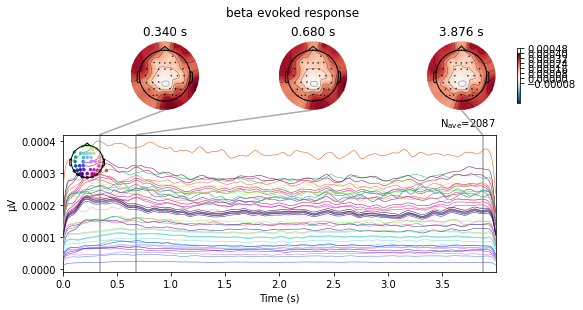

In [5]:
epochs_list = []
for subject in config.preprocessed_subjects_list[:3]:
    for condition in config.conditions:
        epochs = preprocessing.load_subject_epochs_by_type_and_condition(subject, condition, epochs_type, baseline_duration, epoch_duration, pick_type, verbose=False)
        epochs = preprocessing.change_bad_channels(epochs)
        epochs_list.append(epochs)

low_freq = 14
high_freq = 30
all_epochs = mne.concatenate_epochs(epochs_list)
power_epochs = get_power_epochs(all_epochs, low_freq, high_freq)

# save the evoked response of the power_epochs in the beta evoked report directory
os.makedirs(beta_evoked_report_dir, exist_ok=True)
report_out  = beta_evoked_report_dir + f'beta_evoked.html'
report      = Report(report_out, title=f"beta evoked for all subjects for all conditions" , verbose=False)
evoked = power_epochs.average()
figure = evoked.plot_joint(
    title=f"beta evoked response", show=False
)
report.add_figure(figure, title= f"beta evoked response")
report.save(fname=report_out, open_browser=False, overwrite=True)

In [6]:
all_epochs.__len__()

2087